In [24]:
import numpy as np
import os
from py_helpers import *
import matplotlib.pyplot as plt

data_path = "/media/hsa22/Expansion/Brain-MINDS/processed_dMRI/MRTRIX/"

In [25]:
# Get all the csv files
csv_files = glob_files(data_path, "csv")

# Filter for ones from each of 3 atlases
BMA_csv_files = [csv for csv in csv_files if "BMA_connectomes" in csv]
MBCA_csv_files = [csv for csv in csv_files if "MBCA_connectomes" in csv]
MBM_csv_files = [csv for csv in csv_files if "MBM_connectomes" in csv]

# Filter for the tracer streamline ones
BMA_csv_files = [csv for csv in BMA_csv_files if "track" in csv]
MBCA_csv_files = [csv for csv in MBCA_csv_files if "track" in csv]
MBM_csv_files = [csv for csv in MBM_csv_files if "track" in csv]

print("Found {} BMA csv files".format(len(BMA_csv_files)))
print("Found {} MBCA csv files".format(len(MBCA_csv_files)))
print("Found {} MBM csv files".format(len(MBM_csv_files)))

Found 52 BMA csv files
Found 52 MBCA csv files
Found 52 MBM csv files


In [26]:
# Function to flip the matrix
def flip_matrix(matrix):

    # Flip the matrix
    flipped_matrix = np.flip(matrix, axis=0)

    # Flip the matrix again
    flipped_matrix = np.flip(flipped_matrix, axis=1)

    # Add the original to the flipped
    flipped_matrix = flipped_matrix + matrix

    # Return the flipped matrix
    return flipped_matrix
    

# Function to load connectome for every element in a list
def load_connectomes(connectome_paths):

    # Create array to hold connectomes
    connectomes = []
    log_connectomes = []
    symmetrized_connectomes = []
    symmetrized_log_connectomes = []

    for path in connectome_paths:

        # Load the connectome
        connectome = np.genfromtxt(path, delimiter=",")

        # Log the connectome
        log_connectome = np.log(connectome + 1)

        # Symmetrize the connectome
        symmetrized_connectome = flip_matrix(connectome)

        # Symmetrize the log connectome
        symmetrized_log_connectome = flip_matrix(log_connectome)

        # Append to the connectomes
        connectomes.append(connectome)
        log_connectomes.append(log_connectome)
        symmetrized_connectomes.append(symmetrized_connectome)
        symmetrized_log_connectomes.append(symmetrized_log_connectome)
    
    # Return the connectomes
    return connectomes, log_connectomes, symmetrized_connectomes, symmetrized_log_connectomes

In [27]:
(MBCA_connectomes, MBCA_log_connectomes, 
 MBCA_symmetrized_connectomes, MBCA_symmetrized_log_connectomes) = load_connectomes(MBCA_csv_files)
(MBM_connectomes, MBM_log_connectomes, 
 MBM_symmetrized_connectomes, MBM_symmetrized_log_connectomes)  = load_connectomes(MBM_csv_files)

print("Shape of MBCA connectomes: ", MBCA_connectomes[0].shape)

Shape of MBCA connectomes:  (135, 135)


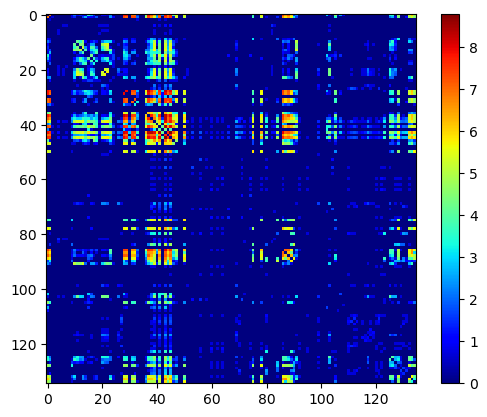

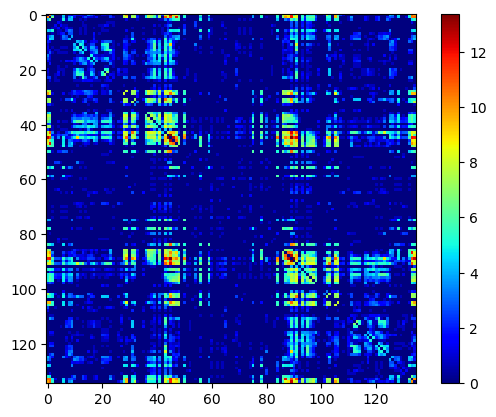

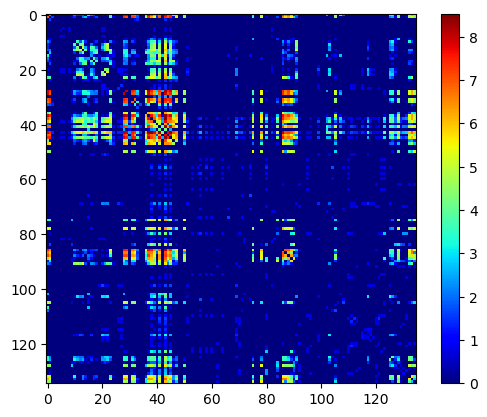

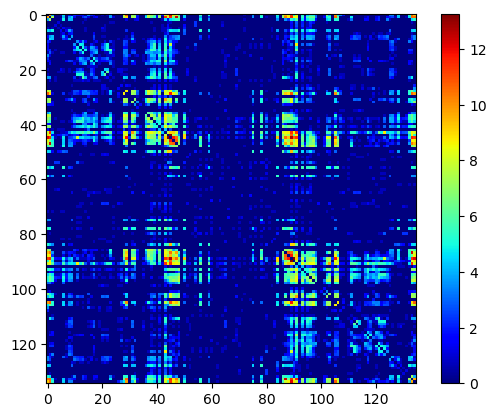

In [30]:
# Make a figure of 4 subplots, each with a log connectome then s

plt.figure()
plt.imshow(MBCA_log_connectomes[2], interpolation='nearest', aspect='equal', cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(MBCA_symmetrized_log_connectomes[2], interpolation='nearest', aspect='equal', cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(MBM_log_connectomes[2], interpolation='nearest', aspect='equal', cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(MBM_symmetrized_log_connectomes[2], interpolation='nearest', aspect='equal', cmap='jet')
plt.colorbar()